**AUTHOR**:     ERYL KENN VICTORINO  
**PURPOSE**:    XGBOOST TUTORIAL  
*from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team*  
**MOD DATE**:   4/20/2019

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# ENCODE CATEGORICAL VARIABLES

In [3]:
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1, 2])],
                        remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

>*prevent dummy varible trap*

In [4]:
X1 = X[:, 1:3]
X2 = X[:, 4:13]
X = np.concatenate((X1, X2), axis=1)

# TRAINING/TEST SPLIT

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# FEATURE SCALING

>*since XGBoost is gradient boosting mode with decision trees, feature scaling is unnecessary*

# XGBOOST FIT ON TRAINING SET

In [6]:
classifier = XGBClassifier(probability = True)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       probability=True, random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

# XGBOOST PREDICTION ON TEST SET

In [7]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# CONFUSION MATRIX

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1521   74]
 [ 197  208]]


# ROC AND AUC

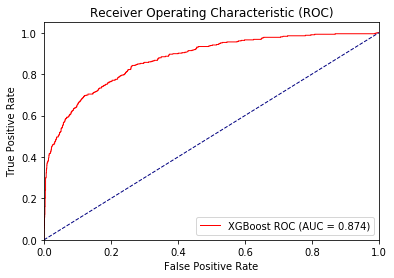

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'red', lw = 1, label = 'XGBoost ROC (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# APPLY K-FOLD CROSS VALIDATION

In [10]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Mean:\t" + str(accuracies.mean()))
print("SD:\t" + str(accuracies.std()))

Mean:	0.8629994451163204
SD:	0.010677872171663988
